In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import yaml

# Heat plot
import holoviews as hv
from holoviews import opts

# Day count map
import cartopy.feature as cfeature
import cartopy.crs as ccrs

from data_handler import DataHandler

from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
gpd.options.io_engine = "pyogrio"

hv.extension('matplotlib')
hv.output(fig='svg')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
# TODO Modularize
with open('../../config/satvis.yaml', 'r') as f:
    config = yaml.safe_load(f)

dir_dict = config['data_directories']
cyano_data = dir_dict['cyano_data']
data_dir = dir_dict['data_dir']

print(cyano_data)
print(data_dir)

C:\Kodning\Satvis\data\satvistest\cyano_data
C:\Kodning\Satvis\data\satvistest\


# Annual ATI time "heat plot"
Based on example in [HoloViews docs](https://holoviews.org/gallery/demos/matplotlib/measles_example.html)

In [4]:
cyano_daymap_files = DataHandler.generate_filepaths(cyano_data, not_pattern='2020')

In [5]:
# TODO Modularize into dataframe_list_from_generator()
cyano_daymap_list = []
cyano_file_list = []
for file in cyano_daymap_files:
    cyano_file_list.append(file)
    gdf = gpd.read_file(file)
    cyano_daymap_list.append(gdf)

In [6]:
cyano_file_list

['C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2002.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2003.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2004.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2005.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2006.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2007.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2008.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2009.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2010.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2011.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2012.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_daymap_2013.gpkg',
 'C:\\Kodning\\Satvis\\data\\satvistest\\cyano_data\\cyano_dayma

In [7]:
for i in range(len(cyano_daymap_list)):
    gdf = cyano_daymap_list[i]
    gdf = gdf.where(gdf['class'].isin([2, 3])).dropna()
    gdf.insert(1, 'date', gdf['from_file'].str.extract(str(r'_(\d{8})\.')))
    gdf['date'] = pd.to_datetime(gdf['date'])
    gdf = gdf[['date', 'geometry']]
    gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
    gdf['area'] = gdf['geometry'].area
    cyano_daymap_list[i] = gdf

C:\Users\k000851\AppData\Local\Temp\ipykernel_9492\1855729747.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
C:\Users\k000851\AppData\Local\Temp\ipykernel_9492\1855729747.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdf = gdf.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(dro

In [8]:
all_cyano_daymaps = pd.concat(cyano_daymap_list)

In [9]:
all_cyano_daymaps['month_day'] = all_cyano_daymaps['date'].dt.strftime('%m-%d')

In [11]:
all_cyano_daymaps['month_day'].min()

'05-18'

In [12]:
all_cyano_daymaps['month_day'].max()

'09-25'

In [13]:
min_md = all_cyano_daymaps['month_day'].min()
max_md = all_cyano_daymaps['month_day'].max()

min_year = all_cyano_daymaps['date'].dt.year.min()
max_year = all_cyano_daymaps['date'].dt.year.max()

years = range(min_year, max_year +1)

date_ranges = [pd.date_range(f'{year}-{min_md}', f'{year}-{max_md}') for year in years]
full_date_range = pd.concat([pd.DataFrame(index=date_range) for date_range in date_ranges])

In [14]:
all_cyano_daymaps[all_cyano_daymaps.duplicated('date', keep=False)]

,geometry,date,area,month_day


In [117]:
all_cyano_test = all_cyano_daymaps[['date', 'month_day', 'area']]

In [118]:
all_cyano_test = all_cyano_test.set_index('date').reindex(full_date_range.index).fillna(0)

In [114]:
all_cyano_test

,month_day,area
2002-05-18,0,0.0
2002-05-19,0,0.0
2002-05-20,0,0.0
2002-05-21,0,0.0
2002-05-22,0,0.0
...,...,...
2023-09-21,09-21,13000000.0
2023-09-22,0,0.0
2023-09-23,0,0.0
2023-09-24,0,0.0


In [119]:
all_cyano_test = all_cyano_test.reset_index()

In [120]:
all_cyano_test = all_cyano_test.rename(columns={'index': 'date'})

In [121]:
all_cyano_test['year'] = all_cyano_test['date'].dt.year
all_cyano_test['month_day'] = all_cyano_test['date'].dt.strftime('%m-%d')

In [122]:
all_cyano_test2 = all_cyano_test.pivot(columns='year', index='month_day', values='area').reset_index().fillna(0)

In [123]:
all_cyano_test2

year,month_day,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,05-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.583000e+09,1.152000e+09,0.0,0.0,0.0,0.0,0.0
1,05-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.906000e+09,1.285000e+09,0.0,0.0,0.0,0.0,0.0
2,05-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.010000e+08,1.170000e+08,0.0,0.0,0.0,0.0,0.0
3,05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.085000e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.059000e+09,1.027000e+09,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,09-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,916000000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,13000000.0
127,09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
128,09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
129,09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,340000000.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [11]:
annual_area_list = []

for cyano_daymap in cyano_daymap_list:
    cyano_daymap = cyano_daymap.where(cyano_daymap['class'].isin([2, 3])).dropna()
    cyano_daymap.insert(1, 'date', cyano_daymap['from_file'].str.extract(str(r'_(\d{8})\.')))
    cyano_daymap['date'] = pd.to_datetime(cyano_daymap['date'])
    cyano_daymap = cyano_daymap[['date', 'geometry']]
    # TODO Fix DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
    cyano_daymap = cyano_daymap.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
    cyano_daymap['year'] = cyano_daymap['date'].dt.year
    cyano_daymap['area'] = cyano_daymap['geometry'].area
    cyano_daymap = cyano_daymap[['date', 'year', 'area']]
    annual_area_list.append(cyano_daymap)
annual_day_area = pd.concat(annual_area_list)

# id_vars=['date'], var_name='year', value_name='area'

C:\Users\k000851\AppData\Local\Temp\ipykernel_22296\4142519337.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cyano_daymap = cyano_daymap.groupby('date', as_index=False).apply(lambda x: x.dissolve()).reset_index(drop=True)
C:\Users\k000851\AppData\Local\Temp\ipykernel_22296\4142519337.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cyano_daymap = cyano_daymap.groupby('date', as_index=False).apply(l

In [12]:
annual_day_area

,date,year,area
0,2002-06-03,2002,2.560000e+08
1,2002-06-04,2002,2.590000e+08
2,2002-06-05,2002,1.331000e+09
3,2002-06-06,2002,6.500000e+08
4,2002-06-07,2002,7.290000e+08
...,...,...,...
39,2004-08-14,2004,5.134000e+09
40,2004-08-18,2004,5.660000e+08
41,2004-08-24,2004,2.477000e+09
42,2004-09-04,2004,1.163000e+09


In [124]:
annual_blooms = pd.melt(all_cyano_test2, id_vars=['month_day'], var_name='year', value_name='test')

In [125]:
annual_blooms

,month_day,year,test
0,05-18,2002,0.0
1,05-19,2002,0.0
2,05-20,2002,0.0
3,05-21,2002,0.0
4,05-22,2002,0.0
...,...,...,...
2877,09-21,2023,13000000.0
2878,09-22,2023,0.0
2879,09-23,2023,0.0
2880,09-24,2023,0.0


In [129]:
# Each box is area.sum() for a single date
heatmap = hv.HeatMap(annual_blooms)
heatmap.opts(aspect=1.4, invert_yaxis=True, show_values=False, show_frame=False, labelled=[], xaxis=None, logz=True)

:HeatMap   [month_day,year]   (test)

In [140]:
# Each box is area.sum() for a single date
heatmap = hv.HeatMap(annual_blooms)
heatmap.opts(
    opts.HeatMap(aspect=1.4, invert_yaxis=True, show_values=False, show_frame=False, labelled=[], logz=True))

:HeatMap   [month_day,year]   (test)

In [34]:
url = 'https://raw.githubusercontent.com/blmoore/blogR/master/data/measles_incidence.csv'
data = pd.read_csv(url, skiprows=2, na_values='-')

yearly_data = data.drop('WEEK', axis=1).groupby('YEAR').sum().reset_index()
measles = pd.melt(yearly_data, id_vars=['YEAR'], var_name='State', value_name='Incidence')

heatmap = hv.HeatMap(measles, label='Measles Incidence')
aggregate = hv.Dataset(heatmap).aggregate('YEAR', np.mean, np.std)

vline = hv.VLine(1963)
marker = hv.Text(1964, 800, 'Vaccine introduction', halign='left')

agg = hv.ErrorBars(aggregate) * hv.Curve(aggregate)

In [20]:
(heatmap + agg * vline * marker).opts(
    opts.HeatMap(aspect=1.4,invert_yaxis=True, show_values=False, show_frame=False,
                 labelled=[], xaxis=None, logz=True),
    opts.Layout(aspect_weight=1, fig_size=300, vspace=0, sublabel_format=None),
    opts.Overlay(aspect=3, show_title=False, bgcolor='white', 
                 show_legend=False, show_frame=False, xrotation=90),
    opts.VLine(color='black', ylim=(0, 1050))).cols(1)

:Layout
   .HeatMap.Measles_Incidence :HeatMap   [YEAR,State]   (Incidence)
   .Overlay.Measles_Incidence :Overlay
      .ErrorBars.Measles_Incidence :ErrorBars   [YEAR]   (Incidence,Incidence_std)
      .Curve.Measles_Incidence     :Curve   [YEAR]   (Incidence,Incidence_std)
      .VLine.I                     :VLine   [x,y]
      .Text.I                      :Text   [x,y]

# Annual ATI bar plot

In [75]:
ati_file = pd.read_csv(f'{data_dir}\\year_ati.csv')

In [76]:
ati_file

,year,A,T,I
0,2003,3.367670e+11,10.188812,3.431255e+12
1,2004,8.648140e+10,5.763881,4.984685e+11


C:\Users\k000851\AppData\Local\Temp\ipykernel_17804\3714203726.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(['0', '1', '2', '3'])
C:\Users\k000851\AppData\Local\Temp\ipykernel_17804\3714203726.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  i.set_yticklabels(['0', '1', '2', '3'])


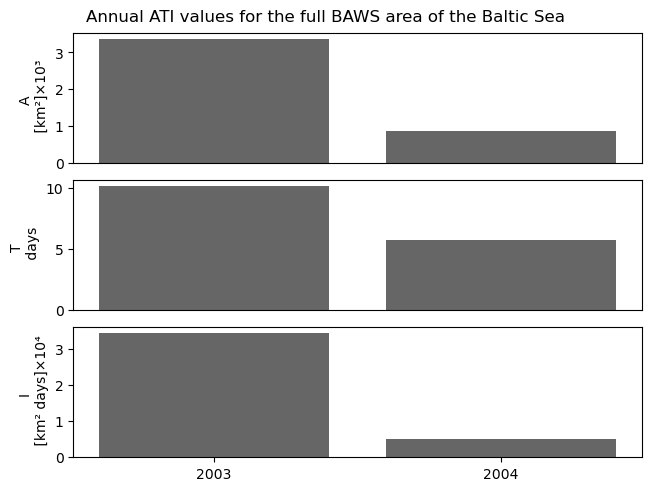

In [63]:
%matplotlib inline

fig = plt.figure(layout='constrained')
fig.suptitle('Annual ATI values for the full BAWS area of the Baltic Sea')

ax_dict = fig.subplot_mosaic(mosaic)

a = ax_dict['A']
a.bar(ati_file['year'], ati_file['A'], color='0.4')
a.set_ylabel('A \n [km\u00b2]\u00D710\u00b3')
a.tick_params(labelbottom=False, bottom=False)
# TODO Fix UserWarning
a.set_yticklabels(['0', '1', '2', '3'])

t = ax_dict['T']
t.bar(ati_file['year'], ati_file['T'], color='0.4')
t.set_ylabel('T \n days')
t.tick_params(labelbottom=False, bottom=False)

i = ax_dict['I']
i.bar(ati_file['year'], ati_file['I'], color='0.4')
i.set_ylabel('I \n [km\u00b2 days]\u00D710\u2074')
# TODO Fix UserWarning
i.set_yticklabels(['0', '1', '2', '3'])
i.set_xticks(np.arange(2003, 2005, 1))

# Annual day count of blooms over entire BAWS area
Plotted as a grid with a subplot for each year

In [77]:
bloom_count_files = DataHandler.generate_filepaths(data_dir, pattern='bloom_day_count')

In [65]:
# TODO dataframe_list_from_generator()
bloom_count_list = []
file_list = []
for file in bloom_count_files:
    file_list.append(file)
    gdf = gpd.read_file(file)
    bloom_count_list.append(gdf)

C:\Users\k000851\AppData\Local\miniforge3\envs\SatvisTest\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\k000851\AppData\Local\miniforge3\envs\SatvisTest\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


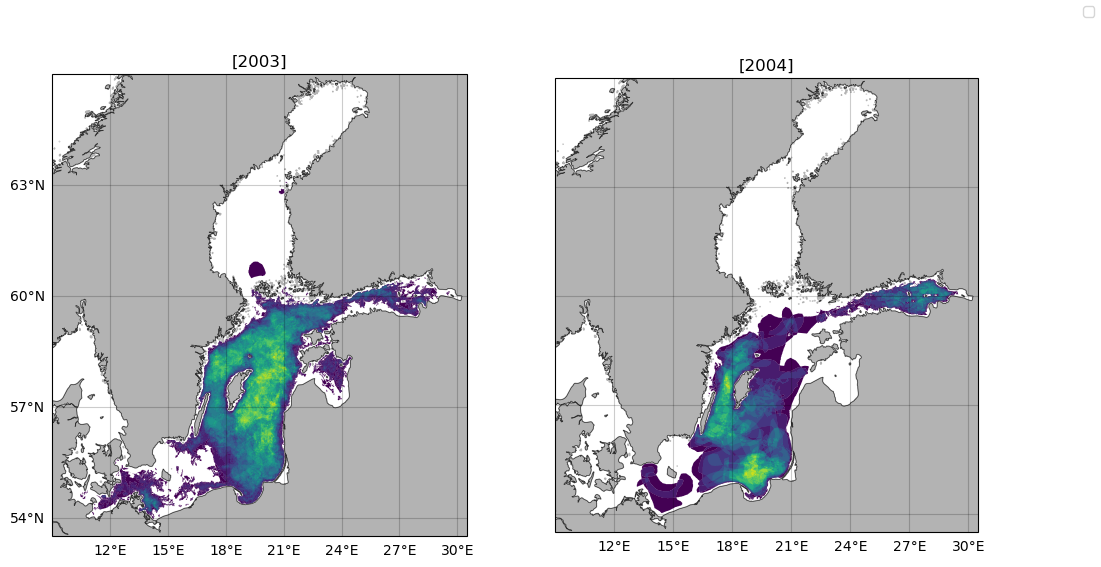

In [70]:
# TODO Refactor to subplot_mosaic
# TODO Fix UserWarning: facecolor will have no effect as it has been defined as "never".
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, (ax, gdf) in enumerate(zip(axs.ravel(), bloom_count_list)):
    ax.set_title(gdf['date'].dt.year.unique())
    gdf.to_crs(epsg=4326).plot(ax=ax, column="n_overlaps", categorical=True, cmap="viridis")

    ax.set_extent([9, 30.5, 53.5, 66], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=0.5, color='0.2')
    ax.add_feature(cfeature.LAND.with_scale('10m'), color='0.7')
    gl = ax.gridlines(draw_labels=True, alpha=0.2, color='black')
    
    if i == 0:
        gl.right_labels = False
        gl.top_labels = False
    else:
        gl.left_labels = False
        gl.right_labels = False
        gl.top_labels = False
    
    gl.xlocator = MultipleLocator(3)
    gl.ylocator = MultipleLocator(3)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# ax = plt.axes(projection=ccrs.PlateCarree())